In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

In [5]:
df = pd.read_csv("C:\\Users\\Sebastian\\Documents\\datasets\\vgsales.csv")

df.head()

df.info()

df.describe()

df.describe(include=[object])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [6]:
twenty_ten_df = df[df["Year"] == 2010]

twenty_ten_df[twenty_ten_df["Global_Sales"] == twenty_ten_df["Global_Sales"].max()]

max_sales_by_year_df = df[["Year","Global_Sales"]].groupby(by="Year", as_index=False).max()

max_sales_by_year_df.merge(df[["Year","Global_Sales","Name"]], on=["Year","Global_Sales"], how="left")

global_sales_per_year_df = df[["Year","Global_Sales"]].groupby("Year", as_index=False).sum()

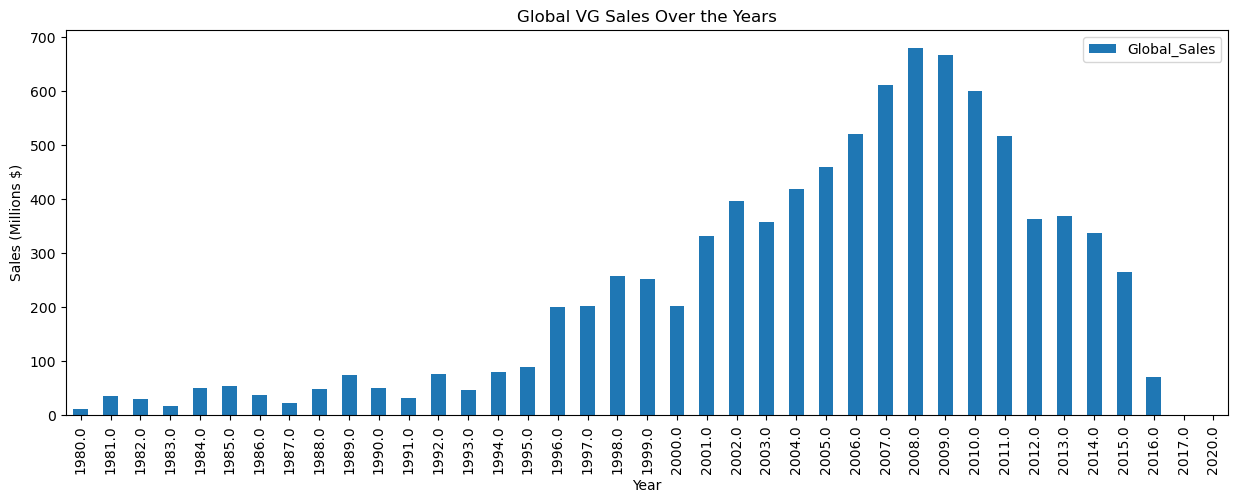

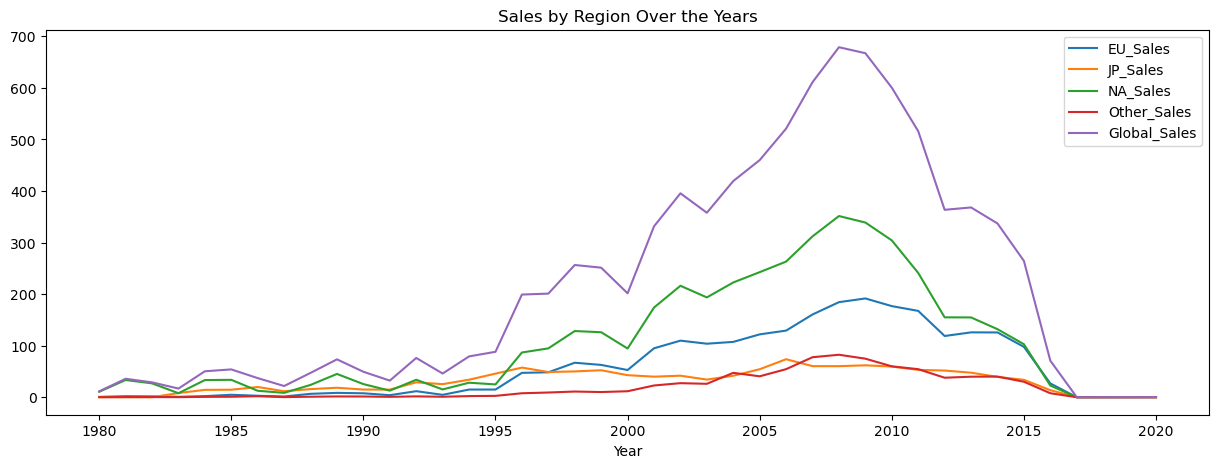

In [7]:

global_sales_per_year_df.plot(kind="bar", x="Year", y = "Global_Sales", figsize=(15,5), ylabel="Sales (Millions $)", title="Global VG Sales Over the Years")

df.head()


df[["Year", "EU_Sales", "JP_Sales", "NA_Sales", "Other_Sales", "Global_Sales"]].groupby(by="Year", as_index=False).sum().plot(
    x="Year",
    title="Sales by Region Over the Years",
    figsize=(15, 5)
)

genre_sales = df.groupby("Genre", as_index=False)["Global_Sales"].sum()
genre_sales.sort_values(by="Global_Sales", ascending=True, inplace=True)


<Axes: title={'center': 'Total Global Sales by Platform'}, xlabel='Platform', ylabel='Sales (Millions $)'>

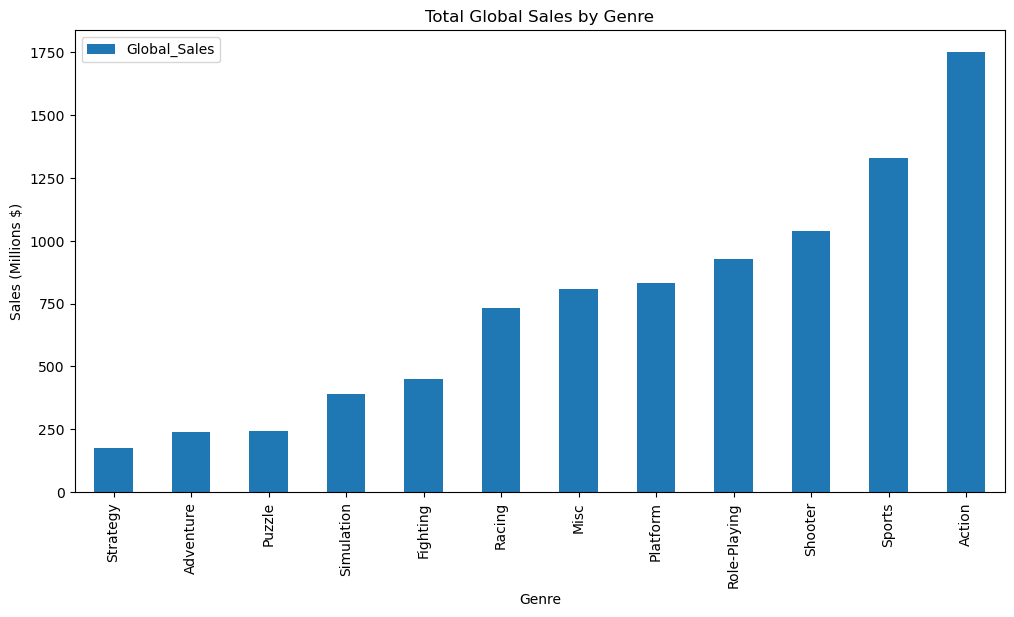

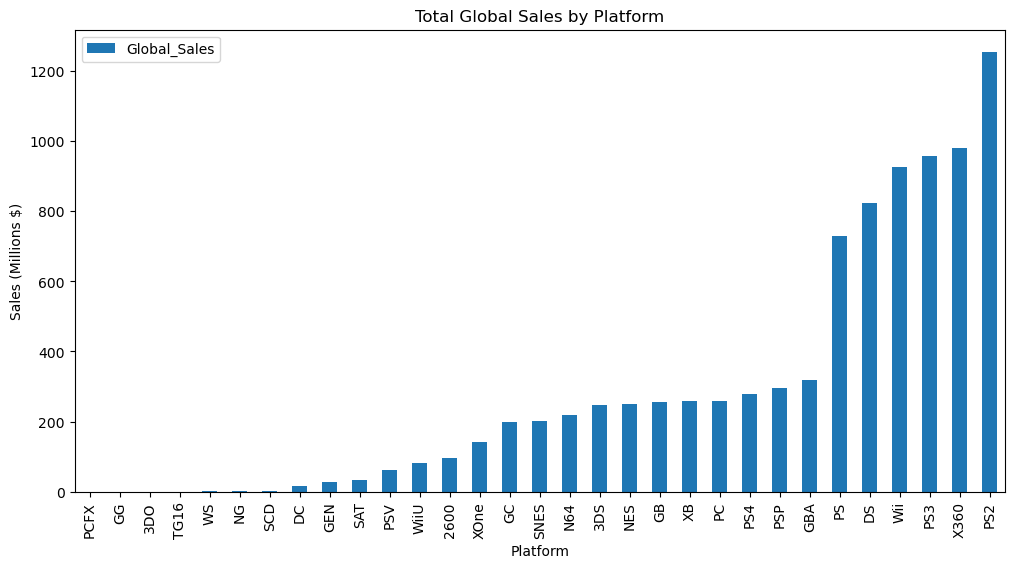

In [8]:
# Plotting
genre_sales.plot(kind="bar", x="Genre", y="Global_Sales", figsize=(12,6), title="Total Global Sales by Genre", ylabel="Sales (Millions $)")

platform_sales = df.groupby("Platform", as_index=False)["Global_Sales"].sum()
platform_sales.sort_values(by="Global_Sales", ascending=True, inplace=True)

# Plotting
platform_sales.plot(kind="bar", x="Platform", y="Global_Sales", figsize=(12,6), title="Total Global Sales by Platform", ylabel="Sales (Millions $)")

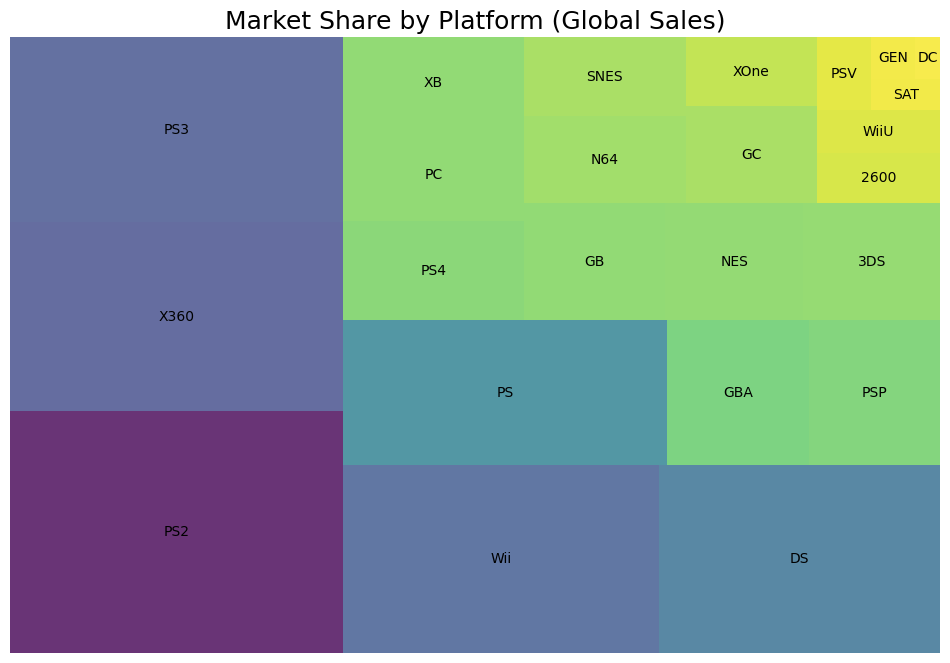

In [13]:
# Calculate total sales for each platform
platform_sales = df.groupby("Platform", as_index=False)["Global_Sales"].sum()
platform_sales.sort_values(by="Global_Sales", ascending=False, inplace=True)

# Set a threshold to filter out small platforms (e.g., 1 million sales)
threshold = 1.9
filtered_platform_sales = platform_sales[platform_sales["Global_Sales"] > threshold]

# Create a treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=filtered_platform_sales["Global_Sales"], 
              label=filtered_platform_sales["Platform"], 
              color=plt.cm.viridis_r(filtered_platform_sales["Global_Sales"] / filtered_platform_sales["Global_Sales"].max()), 
              alpha=0.8)

# Format the plot
plt.title("Market Share by Platform (Global Sales)", fontsize=18)
plt.axis("off")
plt.show()